## **🧾 Problem Statement: Credit Card Spend Analysis and Risk Profiling**

In the financial services domain, understanding customer spending behavior and credit usage patterns is crucial for risk mitigation, profit maximization, and targeted service offerings. This project aims to develop a Credit Card Spend Analysis and Risk Profiling System using monthly transactional and demographic data of customers.

The primary goals of this system are:

1. **Perform monthly analysis** of customer transactions to identify behavioral trends, repayment patterns, and financial risk.

2. C**lean and preprocess the data** by handling invalid or unrealistic entries such as customers below the age of 18.

3. **Detect anomalies,** such as customers who spend beyond their monthly credit limits.

4. **Calculate key financial metrics** including:

    - Monthly spending and repayment for each customer.
    - Monthly due amounts and interest (at 2.9%) charged on unpaid dues.
    - Monthly profit generated for the bank from interest charges.

5. **Segment customers** based on occupation and age groups to assess:

    - Spending behavior by segment and age group.
    - Profitability of different segments.
    - Spending categories with high volume or frequency.

6. **Identify high-value customers,** especially the top 10 highest-paying ones, to explore premium engagement or retention strategies.

7. **Engineer meaningful features** to improve modeling and visualization performance.

8. **Build and evaluate a machine learning pipeline** for classifying or predicting customer behavior based on credit usage and repayment patterns.

9. **Export the final processed data** in .csv/.xlsx format to facilitate the development of a **Power BI dashboard** highlighting insights such as:

    - High-risk profiles
    - Profitable segments
    - Spending hotspots
    - Repayment behavior across regions

> By the end of this project, the solution should provide a comprehensive view of customer risk and opportunity, empowering stakeholders to make data-driven decisions regarding credit policies, marketing, and risk management.



---



## **1. Data Insertion**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = '/content/Credit Banking_Project - 1.xls'

df_customer = pd.read_excel(file_path, sheet_name='Customer Acqusition')
df_spend = pd.read_excel(file_path, sheet_name='Spend')
df_repayment = pd.read_excel(file_path, sheet_name='Repayment')

In [4]:
df_customer.sample(6)

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
70,71,A71,52.333796,BOMBAY,Platimum,10002,C33,Self Employed
30,31,A31,57.094605,CALCUTTA,Gold,500000,C13,Normal Salary
78,79,A79,39.369536,COCHIN,Silver,500000,C41,Govt
23,24,A24,72.647366,DELHI,Silver,100002,C6,Salaried_Pvt
98,99,A99,21.588666,CALCUTTA,Platimum,10002,C22,Self Employed
88,89,A89,7.737083,CALCUTTA,Gold,500000,C12,Govt


In [5]:
df_spend.sample(6)

,Sl No:,Costomer,Month,Type,Amount
941,942,A32,2004-01-25,PETRO,221207.747748
304,305,A17,2006-03-28,CAMERA,467706.803485
1089,1090,A50,2004-01-15,CLOTHES,399464.003196
890,891,A39,2005-04-04,CAMERA,246625.541835
1380,1381,A51,2005-02-01,CLOTHES,263755.133352
323,324,A18,2004-01-25,FOOD,413507.814682


In [6]:
df_repayment.sample(6)

,SL No:,Costomer,Month,Amount
1092,1093,A53,2004-09-13,414898.088387
930,931,A21,2004-01-15,53734.227736
618,619,A28,2005-05-07,14404.876490
517,518,A13,2005-05-29,66308.949088
1224,1225,A40,2006-05-08,495987.098175
422,423,A13,2006-11-03,262888.663441


## **2. EDA Part 1 - Understanding the Data**

##### **df_customer**

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [8]:
df_customer.describe(include='all')

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
count,100.000000,100,100.000000,100,100,100.000000,100,100
unique,NaN,100,NaN,8,3,NaN,41,5
top,NaN,A1,NaN,COCHIN,Gold,NaN,C5,Govt
freq,NaN,1,NaN,20,38,NaN,4,29
mean,50.500000,NaN,40.146505,NaN,NaN,284700.610000,NaN,NaN
std,29.011492,NaN,23.629594,NaN,NaN,218494.967852,NaN,NaN
min,1.000000,NaN,0.726493,NaN,NaN,10000.000000,NaN,NaN
25%,25.750000,NaN,20.254138,NaN,NaN,100000.000000,NaN,NaN
50%,50.500000,NaN,40.545682,NaN,NaN,300001.500000,NaN,NaN
75%,75.250000,NaN,61.606910,NaN,NaN,500000.000000,NaN,NaN


In [9]:
df_customer.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [10]:
# checking mean values in terms of %

df_customer.isnull().mean() * 100

# ''' No missing values found '''

,0
Sl No:,0.0
Customer,0.0
Age,0.0
City,0.0
Credit Card Product,0.0
Limit,0.0
Company,0.0
Segment,0.0


In [11]:
df_customer[df_customer.duplicated()]

# ''' NO duplicates found '''

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment


##### **df_spend**

In [12]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [13]:
df_spend.describe(include='all')

,Sl No:,Costomer,Month,Type,Amount
count,1500.000000,1500,1500,1500,1500.000000
unique,NaN,100,NaN,15,NaN
top,NaN,A60,NaN,PETRO,NaN
freq,NaN,38,NaN,200,NaN
mean,750.500000,NaN,2005-05-16 21:17:45.600000,NaN,254234.698954
min,1.000000,NaN,2004-01-03 00:00:00,NaN,783.032154
25%,375.750000,NaN,2004-04-25 00:00:00,NaN,121631.602551
50%,750.500000,NaN,2005-05-29 00:00:00,NaN,262959.087543
75%,1125.250000,NaN,2006-03-26 00:00:00,NaN,381925.385450
max,1500.000000,NaN,2006-12-03 00:00:00,NaN,499682.470459


In [14]:
df_spend.head()

,Sl No:,Costomer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,473775.834869
1,2,A1,2004-01-03,PETRO,335578.666019
2,3,A1,2004-01-15,CLOTHES,371040.941912
3,4,A1,2004-01-25,FOOD,141177.813256
4,5,A1,2005-01-17,CAMERA,398403.771812


In [15]:
# checking mean values in terms of %

df_spend.isnull().mean() * 100

# ''' No missing values found '''

,0
Sl No:,0.0
Costomer,0.0
Month,0.0
Type,0.0
Amount,0.0


In [16]:
df_spend[df_spend.duplicated()]

# ''' NO duplicates found '''

,Sl No:,Costomer,Month,Type,Amount


##### **df_repayment**

In [17]:
df_repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [18]:
df_repayment.describe(include='all')

,SL No:,Costomer,Month,Amount
count,1500.000000,1500,1500,1500.000000
unique,NaN,100,NaN,NaN
top,NaN,A60,NaN,NaN
freq,NaN,38,NaN,NaN
mean,750.500000,NaN,2005-05-24 01:18:43.199999872,247472.296084
min,1.000000,NaN,2004-01-03 00:00:00,183.218203
25%,375.750000,NaN,2004-05-05 00:00:00,120422.872372
50%,750.500000,NaN,2005-05-29 00:00:00,247332.616560
75%,1125.250000,NaN,2006-03-28 00:00:00,369014.873206
max,1500.000000,NaN,2006-12-03 00:00:00,499344.940170


In [19]:
df_repayment.head()

,SL No:,Costomer,Month,Amount
0,1,A1,2004-01-12,331844.007374
1,2,A1,2004-01-03,441139.807335
2,3,A1,2004-01-15,32480.004009
3,4,A1,2004-01-25,90636.966534
4,5,A1,2005-01-17,1581.969829


In [20]:
# checking mean values in terms of %

df_repayment.isnull().mean() * 100

# ''' No missing values found '''

,0
SL No:,0.0
Costomer,0.0
Month,0.0
Amount,0.0


In [21]:
df_repayment[df_repayment.duplicated()]

# ''' NO duplicates found '''

,SL No:,Costomer,Month,Amount


## **3. Preprocessing**

In [22]:
# Cleaning the column names

df_customer.columns = df_customer.columns.str.strip().str.lower().str.replace(" ", "_")
df_spend.columns = df_spend.columns.str.strip().str.lower().str.replace(" ", "_")
df_repayment.columns = df_repayment.columns.str.strip().str.lower().str.replace(" ", "_")

In [23]:
df_spend.rename(columns={'costomer': 'customer'}, inplace=True)
df_repayment.rename(columns={'costomer': 'customer'}, inplace=True)

In [24]:
''' df_customer '''

' df_customer '

In [25]:
df_customer['sl_no:'] = pd.to_numeric(df_customer['sl_no:'])

df_customer.rename(columns={'sl_no:': 'sno'}, inplace=True)

df_customer.set_index('sno', inplace=True)

In [26]:
df_customer.sample(3)

,customer,age,city,credit_card_product,limit,company,segment
sno,,,,,,,
26,A26,26.135456,PATNA,Gold,500000,C8,Normal Salary
34,A34,49.219986,CALCUTTA,Platimum,100000,C16,Salaried_Pvt
72,A72,12.911575,BANGALORE,Silver,100000,C34,Self Employed


In [27]:
''' df_spend '''

' df_spend '

In [28]:
df_spend['sl_no:'] = pd.to_numeric(df_spend['sl_no:'])

df_spend.rename(columns={'sl_no:': 'sno'}, inplace=True)

df_spend.set_index('sno', inplace=True)

In [29]:
df_spend.sample(3)

,customer,month,type,amount
sno,,,,
841,A47,2005-02-03,FOOD,64795.529046
790,A25,2005-05-07,JEWELLERY,29651.031514
999,A46,2006-03-05,CAMERA,436880.745764


In [30]:
''' df_repayment '''

' df_repayment '

In [31]:
df_repayment['sl_no:'] = pd.to_numeric(df_repayment['sl_no:'])

df_repayment.rename(columns={'sl_no:': 'sno'}, inplace=True)

df_repayment.set_index('sno', inplace=True)

In [32]:
df_repayment.sample(3)

,customer,month,amount
sno,,,
309,A21,2004-01-03,68929.586093
1106,A37,2005-06-01,384928.071929
1416,A57,2006-04-03,160781.682667


In [33]:
# Convering the datetime columns

df_spend['month'] = pd.to_datetime(df_spend['month'])
df_repayment['month'] = pd.to_datetime(df_repayment['month'])

In [34]:
# chanding the data type

df_repayment['amount'] = df_repayment['amount'].astype(int)
df_spend['amount'] = df_spend['amount'].astype(int)
df_customer['age'] = df_customer['age'].astype(int)

In [35]:
# Age treatment

df_customer[(df_customer['age'] < 18) | (df_customer['age'] > 100)].shape  # unrealistic entries

(22, 7)

In [36]:
# There is very limited data so removing it will not be the best choice.
# The best choice in removing these outliers is to set these outliers as the threshold like for all the values less then 18 as 18 and values more that 80 as 80.

df_customer['age'] = np.where(
    df_customer['age'] <= 18,
    18,
    np.where(
        df_customer['age'] > 80,
        80,
        df_customer['age']
        )
    )

<Axes: >

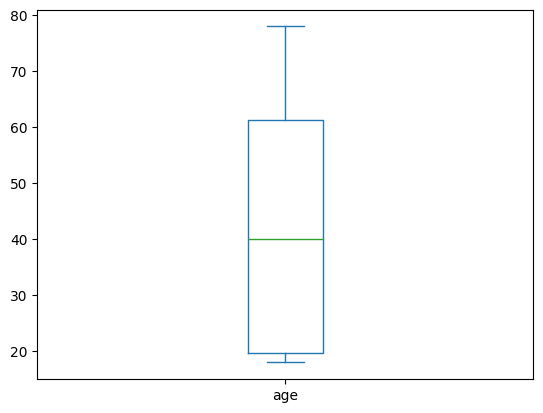

In [37]:
df_customer['age'].plot(kind='box')

In [38]:
df_customer = df_customer.reset_index(drop=True)
df_spend = df_spend.reset_index(drop=True)
df_repayment = df_repayment.reset_index(drop=True)

In [39]:
# checking and fixing inconsistent categorical values

df_customer['credit_card_product'] = df_customer['credit_card_product'].str.title().str.strip()
df_customer['segment'] = df_customer['segment'].str.replace('_', ' ').str.title().str.strip()
df_customer['city'] = df_customer['city'].str.title().str.strip()

<Axes: ylabel='amount'>

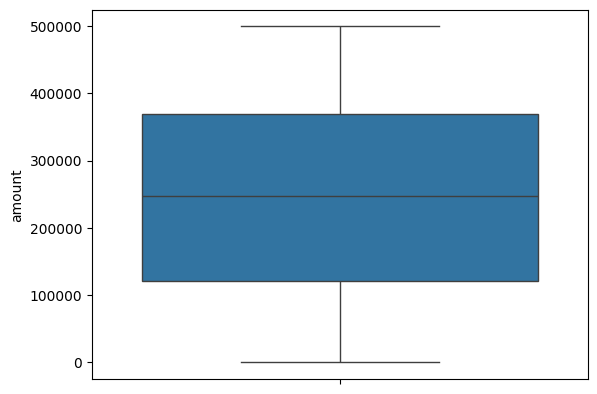

In [40]:
sns.boxplot(df_repayment['amount'])

In [41]:
df_spend['type'].unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

In [42]:
df_spend.sample(3)

,customer,month,type,amount
170,A13,2006-08-03,BUS TICKET,144684
204,A5,2004-01-03,PETRO,298235
265,A14,2005-06-03,CAMERA,81901


In [43]:
df_customer['credit_card_product'].unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [44]:
# Fixing typo: "Platimum" → "Platinum"

df_customer['credit_card_product'] = df_customer['credit_card_product'].replace({'Platimum': 'Platinum'})

In [45]:
df_spend.sample(10)

,customer,month,type,amount
226,A13,2005-02-28,CLOTHES,456791
563,A21,2005-04-04,PETRO,122290
1132,A62,2005-05-29,PETRO,104608
814,A21,2005-10-03,BUS TICKET,125837
899,A48,2006-05-08,PETRO,327519
1245,A61,2005-06-02,AIR TICKET,321723
1013,A61,2004-09-13,CAR,87522
893,A42,2006-04-19,AIR TICKET,208085
670,A22,2004-03-19,FOOD,364043
1183,A57,2006-04-04,PETRO,183529


In [46]:
df_customer.sample(5)

,customer,age,city,credit_card_product,limit,company,segment
16,A17,70,Bombay,Gold,500000,C17,Self Employed
49,A50,67,Cochin,Platinum,100000,C12,Salaried Pvt
50,A51,51,Bombay,Platinum,100001,C13,Govt
92,A93,47,Delhi,Gold,500000,C16,Govt
8,A9,18,Chennai,Silver,100003,C9,Govt


In [47]:
df_spend['spend_month'] = df_spend['month'].dt.to_period('M')
df_repayment['repayment_month'] = df_repayment['month'].dt.to_period('M')

In [48]:
# checking if the customer is valid or not, if not then taking only the valid ones

valid_customers = set(df_customer['customer'])

df_spend = df_spend[df_spend['customer'].isin(valid_customers)].copy()
df_repayment = df_repayment[df_repayment['customer'].isin(valid_customers)].copy()

In [49]:
# removing the unrealistic credit amount

df_customer = df_customer[df_customer['limit'] >= 10000].copy()

## **4. Feature Engineering**

#### **Feature Construction**

In [50]:
df_spend.head()

,customer,month,type,amount,spend_month
0,A1,2004-01-12,JEWELLERY,473775,2004-01
1,A1,2004-01-03,PETRO,335578,2004-01
2,A1,2004-01-15,CLOTHES,371040,2004-01
3,A1,2004-01-25,FOOD,141177,2004-01
4,A1,2005-01-17,CAMERA,398403,2005-01


image.png

In [51]:
monthly_spend = df_spend.groupby(['customer', 'spend_month'])['amount'].sum().reset_index()

In [52]:
monthly_spend

,customer,spend_month,amount
0,A1,2004-01,1511169
1,A1,2004-02,41381
2,A1,2004-05,131196
3,A1,2005-01,398403
4,A1,2005-02,1404190
...,...,...,...
802,A95,2004-01,347833
803,A96,2004-01,320363
804,A97,2004-01,164330
805,A98,2004-01,87483


In [53]:
monthly_spend.rename(columns={'spend_month': 'month', 'amount': 'monthly_spend'}, inplace=True)

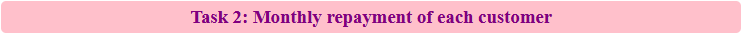

In [54]:
monthly_repayment = df_repayment.groupby(['customer', 'repayment_month'])['amount'].sum().reset_index()

In [55]:
monthly_repayment

,customer,repayment_month,amount
0,A1,2004-01,1362772
1,A1,2004-02,191180
2,A1,2005-01,1581
3,A1,2005-02,1199806
4,A1,2005-07,300581
...,...,...,...
793,A95,2004-01,75109
794,A96,2004-01,110139
795,A97,2004-01,174606
796,A98,2004-01,97802


In [56]:
monthly_repayment.rename(columns={'repayment_month': 'month', 'amount': 'monthly_repayment'}, inplace=True)

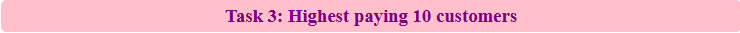

In [59]:
total_repayment = df_repayment.groupby('customer')['amount'].sum().reset_index()

In [60]:
total_repayment

,customer,amount
0,A1,3831930
1,A10,5230303
2,A100,151141
3,A11,4735291
4,A12,7572738
...,...,...
95,A95,75109
96,A96,110139
97,A97,174606
98,A98,97802


In [61]:
total_repayment.rename(columns={'amount': 'total_repayment'}, inplace=True)

In [62]:
top_10_customers = total_repayment.sort_values(by='total_repayment', ascending=False).head(10)
top_10_customers

,customer,total_repayment
15,A22,9767156
57,A60,9262016
58,A61,8807868
35,A40,8805070
42,A47,8529807
38,A43,8458607
43,A48,8432786
36,A41,8374029
44,A49,8259825
40,A45,8115193


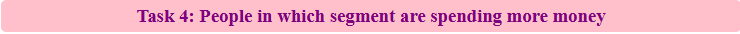

In [63]:
customer_spend = df_spend.groupby('customer')['amount'].sum().reset_index()
customer_spend

,customer,amount
0,A1,4858284
1,A10,4110775
2,A100,42254
3,A11,4581915
4,A12,6848572
...,...,...
95,A95,347833
96,A96,320363
97,A97,164330
98,A98,87483


In [64]:
customer_spend.rename(columns={'amount': 'total_spend'}, inplace=True)

In [65]:
spend_with_segment = pd.merge(customer_spend, df_customer[['customer', 'segment']], on='customer', how='left')

In [66]:
segment_spend = spend_with_segment.groupby('segment')['total_spend'].sum().reset_index().sort_values(by='total_spend', ascending=False)

In [67]:
segment_spend

,segment,total_spend
1,Normal Salary,107706918
3,Salaried Pvt,71704172
4,Self Employed,70975336
0,Govt,67325498
2,Salaried Mnc,63639368


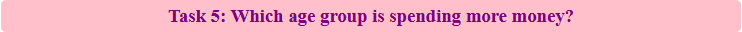

In [68]:
# Numeric age bucket
def age_bucket_numeric(age):
    if age < 25:
        return '18-24'
    elif age <= 25 and age < 35:
        return '25-34'
    elif age <= 35 and age < 45:
        return '35-44'
    elif age <= 45 and age < 55:
        return '45-54'
    elif age <= 55 and age < 65:
        return '55-64'
    else:
        return '65+'

In [69]:
df_customer['age_group'] = df_customer['age'].apply(age_bucket_numeric)

In [70]:
spend_with_age = pd.merge(customer_spend, df_customer[['customer', 'age_group']], on='customer', how='left')

In [71]:
age_group_spend = spend_with_age.groupby('age_group')['total_spend'].sum().reset_index().sort_values(by='total_spend', ascending=False)

age_group_spend

,age_group,total_spend
5,65+,150191969
0,18-24,113478154
3,45-54,45008209
4,55-64,38375781
2,35-44,28960025
1,25-34,5337154


In [72]:
# name age group
def age_bucket_name(age):
    if age < 30:
        return 'Young Adult'
    elif age < 48:
        return 'Middle Aged'
    elif age < 60:
        return 'Senior Adult'
    else:
        return 'Elderly'

In [73]:
df_customer['age_group_name'] = df_customer['age'].apply(age_bucket_name)

In [74]:
df_customer.head()

,customer,age,city,credit_card_product,limit,company,segment,age_group,age_group_name
0,A1,18,Bangalore,Gold,500000,C1,Self Employed,18-24,Young Adult
1,A2,35,Calcutta,Silver,100000,C2,Salaried Mnc,35-44,Middle Aged
2,A3,18,Cochin,Platinum,10000,C3,Salaried Pvt,18-24,Young Adult
3,A4,45,Bombay,Platinum,10001,C4,Govt,45-54,Middle Aged
4,A5,69,Bangalore,Platinum,10002,C5,Normal Salary,65+,Elderly


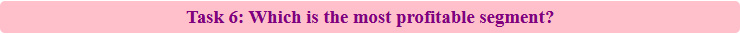

In [75]:
# merging spend data with customer info
df_spend_merged = pd.merge(df_spend, df_customer, on='customer', how='left')

# merging repayment data with customer info
df_repay_merged = pd.merge(df_repayment, df_customer, on='customer', how='left')

In [76]:
monthly_summary = pd.merge(monthly_spend, monthly_repayment, on=['customer', 'month'], how='outer')
monthly_summary.fillna(0, inplace=True)

In [77]:
monthly_summary['profit'] = monthly_summary['monthly_repayment'] - monthly_summary['monthly_spend']

In [78]:
monthly_profit = pd.merge(monthly_summary, df_customer[['customer', 'segment']], on='customer', how='left')

In [79]:
segment_profit = monthly_profit.groupby('segment')['profit'].sum().reset_index()

In [80]:
segment_profit.sort_values(by='profit', ascending=False, inplace=True)

segment_profit

,segment,profit
4,Self Employed,-424178.0
1,Normal Salary,-598252.0
2,Salaried Mnc,-1042085.0
0,Govt,-2154230.0
3,Salaried Pvt,-5924859.0


In [81]:
'''

cause of negative profit :-

- customers might be spending more than they repay in that month
- or maybe some months have very high spending with low repayments

'''

'\n\ncause of negative profit :-\n\n- customers might be spending more than they repay in that month\n- or maybe some months have very high spending with low repayments\n\n'

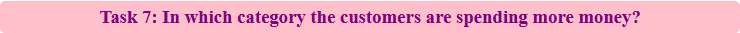

In [82]:
category_spend = df_spend.groupby('type')['amount'].sum().reset_index()

In [83]:
category_spend = category_spend.sort_values(by='amount', ascending=False).reset_index(drop=True)

category_spend

,type,amount
0,PETRO,51022481
1,CAMERA,43720927
2,FOOD,38296380
3,AIR TICKET,37435390
4,TRAIN TICKET,31812563
5,SHOPPING,27418624
6,JEWELLERY,25247908
7,BUS TICKET,24905844
8,CLOTHES,24791054
9,RENTAL,20914637


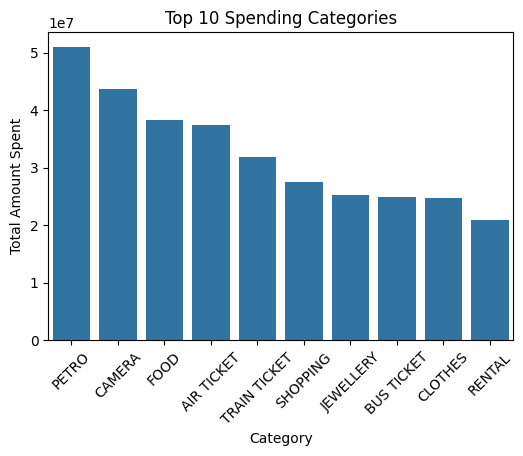

In [84]:
plt.figure(figsize=(6,4))
sns.barplot(data=category_spend.head(10), x='type', y='amount')
plt.title('Top 10 Spending Categories')
plt.xticks(rotation=45)
plt.ylabel('Total Amount Spent')
plt.xlabel('Category')
plt.show()

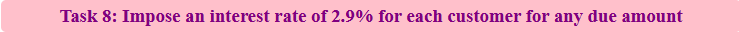

In [85]:
monthly_summary['due_amount'] = monthly_summary['monthly_spend'] - monthly_summary['monthly_repayment']

In [86]:
monthly_summary['due_amount'] = monthly_summary['due_amount'].apply(lambda x: x if x > 0 else 0)

In [87]:
monthly_summary['interest'] = monthly_summary['due_amount'] * 0.029

In [88]:
monthly_summary

,customer,month,monthly_spend,monthly_repayment,profit,due_amount,interest
0,A1,2004-01,1511169.0,1362772.0,-148397.0,148397.0,4303.513
1,A1,2004-02,41381.0,191180.0,149799.0,0.0,0.000
2,A1,2004-05,131196.0,0.0,-131196.0,131196.0,3804.684
3,A1,2005-01,398403.0,1581.0,-396822.0,396822.0,11507.838
4,A1,2005-02,1404190.0,1199806.0,-204384.0,204384.0,5927.136
...,...,...,...,...,...,...,...
1097,A95,2004-01,347833.0,75109.0,-272724.0,272724.0,7908.996
1098,A96,2004-01,320363.0,110139.0,-210224.0,210224.0,6096.496
1099,A97,2004-01,164330.0,174606.0,10276.0,0.0,0.000
1100,A98,2004-01,87483.0,97802.0,10319.0,0.0,0.000


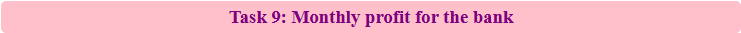

In [89]:
# monthly profit without interest

monthly_profit = monthly_summary.groupby('month')['profit'].sum().reset_index()

In [90]:
monthly_profit.rename(columns={'profit': 'monthly_profit'}, inplace=True)

In [91]:
monthly_profit.sort_values(ascending = False, by = 'monthly_profit').head()

,month,monthly_profit
22,2006-05,7803232.0
13,2005-08,1966546.0
5,2004-09,1499923.0
4,2004-05,1351167.0
24,2006-07,1335954.0


In [92]:
monthly_profit.head()

,month,monthly_profit
0,2004-01,-7438646.0
1,2004-02,-1833845.0
2,2004-03,367438.0
3,2004-04,54901.0
4,2004-05,1351167.0


In [93]:
# monthly profit with interest

monthly_summary['adjusted_profit'] = monthly_summary['profit'] + monthly_summary['interest']

In [94]:
monthly_profit_with_interest = monthly_summary.groupby('month')['adjusted_profit'].sum().reset_index()

In [95]:
monthly_profit_with_interest.rename(columns={'adjusted_profit': 'monthly_profit'}, inplace=True)

In [96]:
monthly_profit_with_interest.head()

,month,monthly_profit
0,2004-01,-6860923.602
1,2004-02,-1654529.416
2,2004-03,458984.446
3,2004-04,194759.909
4,2004-05,1433221.601


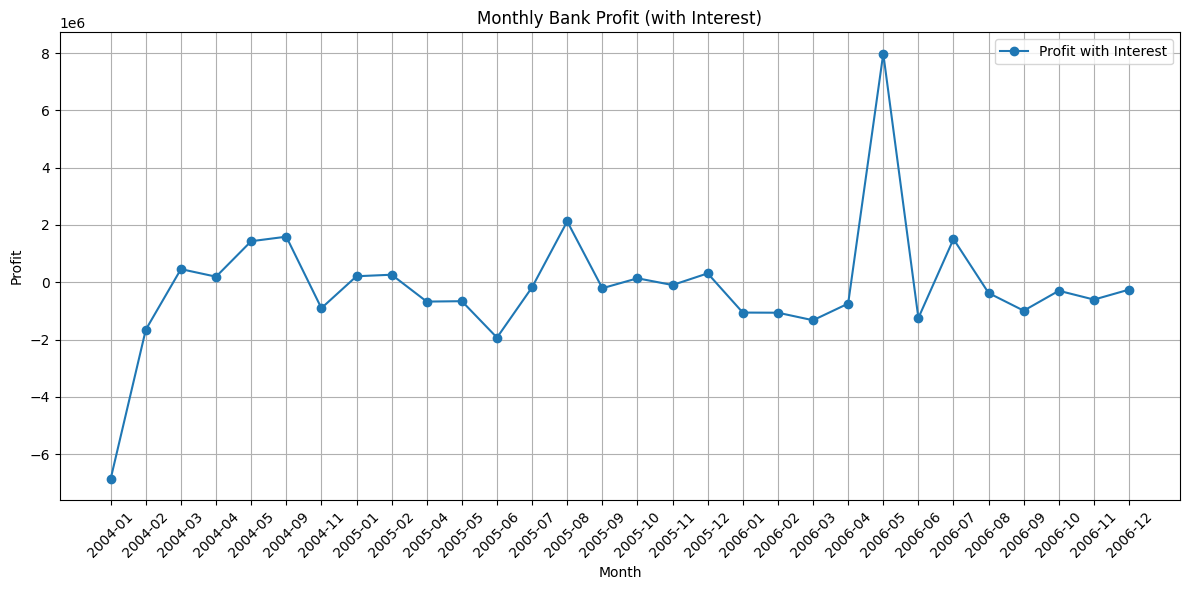

In [97]:
plt.figure(figsize=(12,6))
plt.plot(monthly_profit_with_interest['month'].astype(str), monthly_profit_with_interest['monthly_profit'], marker='o', label='Profit with Interest')
plt.xticks(rotation=45)
plt.title('Monthly Bank Profit (with Interest)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **5. EDA Part 2 - Visualization**

#### **Univariate Analysis**

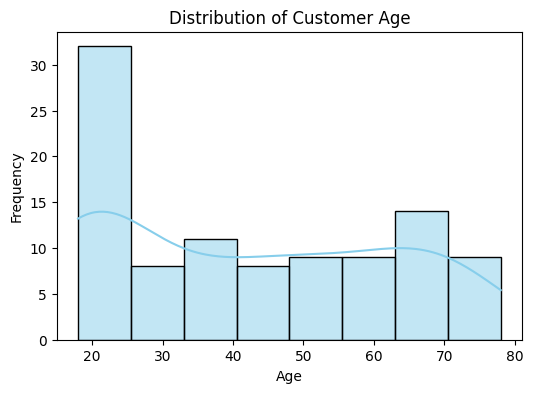

In [98]:
# @title **Distribution of Customer Age**
# Age Distribution

plt.figure(figsize=(6, 4))
sns.histplot(df_customer['age'], kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Distribution of Customer Age**

- Range of Ages: The customers' ages range from approximately 18 to just under 80 years old, as indicated by the extent of the histogram.
- Bimodal Distribution: The distribution of customer ages appears to be bimodal, meaning it has two prominent peaks. This suggests there are two age groups that are more frequent among the customers.
- Peak 1: Younger Customers: The most significant peak is in the younger age range, roughly between 18 and 25 years old. This indicates a substantial segment of younger customers.
- Peak 2: Older Customers: There's a second, smaller peak in the older age range, approximately between 60 and 75 years old. This suggests a noticeable presence of older customers as well.
- Lower Frequencies in Middle Ages: The frequency of customers in the middle age groups (roughly 30 to 55 years old) seems to be relatively lower compared to the younger and older peaks.

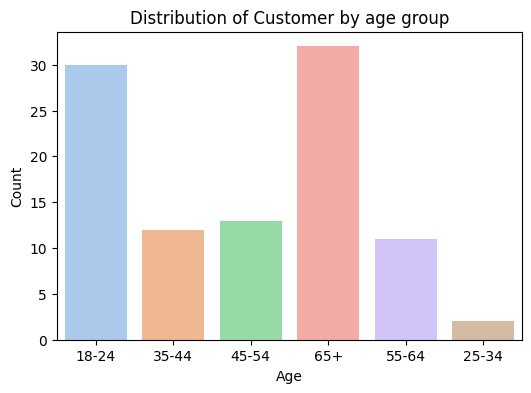

In [99]:
# @title **Distribution of Customer by age group**
# age_group Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=df_customer, palette='pastel')
plt.title('Distribution of Customer by age group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Distribution of Customer by age group**

- Largest Group: Most customers are 65+.
- Significant Young: 18-24 is the second largest group.
- Moderate Middle: 35-44 and 45-54 have similar, medium counts.
- Smaller Middle: 55-64 has a lower count.
- Smallest Group: 25-34 has the fewest customers.
- Bimodal-like: Peaks at young and old ages, lower in the middle.
- Targeting: Marketing might focus on 18-24 and 65+ groups.
- Underrepresented: 25-34 and 55-64 are smaller segments.

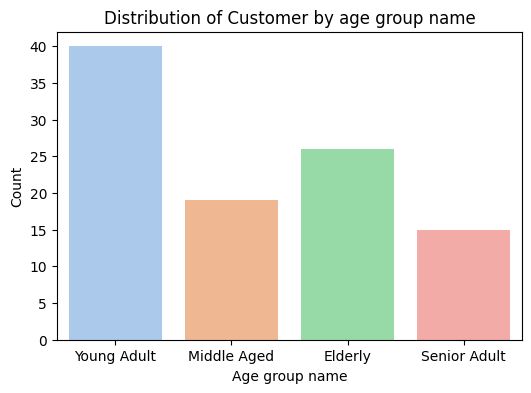

In [ ]:
# @title **Distribution of Customer by age group name**
# age_group Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group_name', data=df_customer, palette='pastel')
plt.title('Distribution of Customer by age group name')
plt.xlabel('Age group name')
plt.ylabel('Count')
plt.show()

**Distribution of Customer by age group name**

- Largest Group: Most customers are "Young Adult".
- Significant Elderly: "Elderly" is the second largest group.
- Moderate Middle: "Middle Aged" has a moderate count.
- Smallest Group: "Senior Adult" has the fewest customers.
- Dominant Young: "Young Adult" segment is notably larger.
- Marketing Focus: Strategies might prioritize "Young Adult" and "Elderly" groups.
- Underrepresented: "Senior Adult" segment is smaller.
- Varied Distribution: Customer distribution is uneven across age group names.

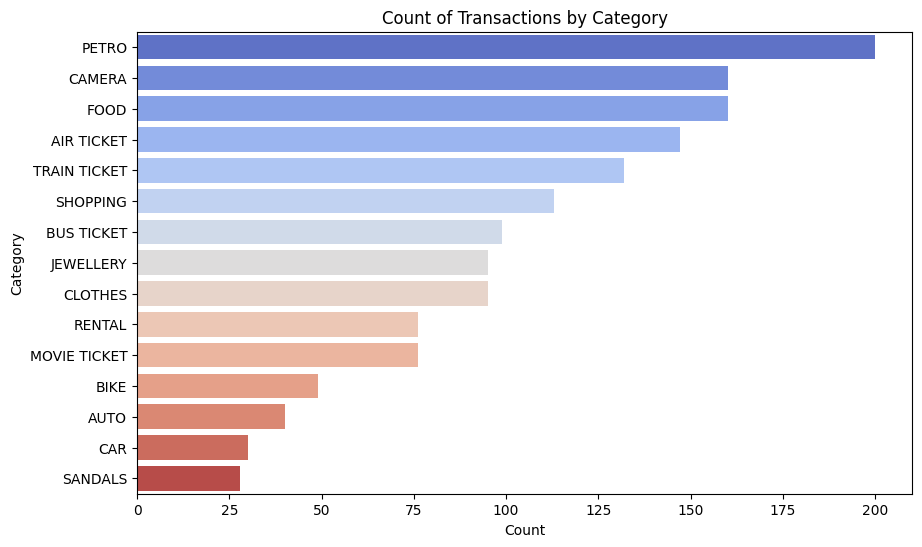

In [ ]:
# @title **Count of Transactions by Category**
# Category Spend Count

plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df_spend, order=df_spend['type'].value_counts().index, palette='coolwarm')
plt.title('Count of Transactions by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Count of Transactions by Category**

- Most Frequent: "PETRO" has the highest number of transactions.
- High Frequency: "CAMERA" and "FOOD" also have a large number of transactions.
- Mid-Range: "AIR TICKET", "TRAIN TICKET", and "SHOPPING" show a moderate transaction count.
- Lower Frequency: "BUS TICKET", "JEWELLERY", and "CLOTHES" have fewer transactions compared to the top categories.
- Least Frequent: "RENTAL", "MOVIE TICKET", "BIKE", "AUTO", "CAR", and "SANDALS" have the lowest transaction counts.
- Spending Habits: Customers transact most frequently on "PETRO", "CAMERA", and "FOOD".
- Less Common Spending: Categories like "RENTAL", "MOVIE TICKET", and transportation modes other than air and train have lower transaction frequency.
- Potential Focus: Businesses might focus on understanding the drivers behind the high frequency of "PETRO", "CAMERA", and "FOOD" transactions.
- Marketing Opportunities: There might be opportunities to encourage more transactions in the less frequent categories.
- Coolwarm Palette: The color gradient (coolwarm) doesn't inherently represent a specific order or value, but visually distinguishes the categories.

#### **Bivariate Analysis**

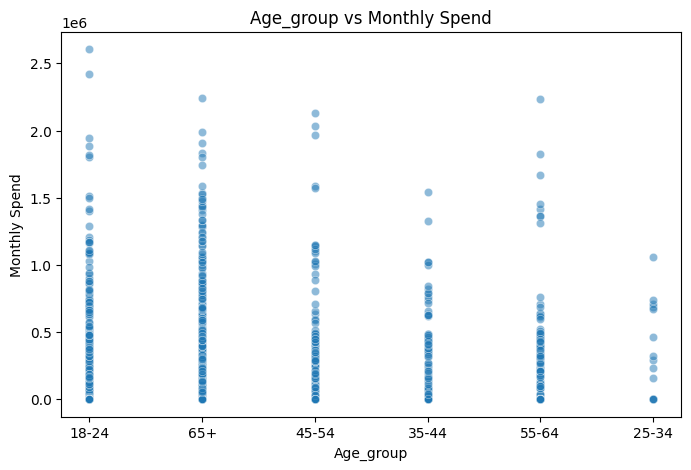

In [ ]:
# Merge age_group into monthly_summary

monthly_summary_age = pd.merge(monthly_summary, df_customer[['customer', 'age_group']], on='customer', how='left')

plt.figure(figsize=(8, 5))
sns.scatterplot(data=monthly_summary_age, x='age_group', y='monthly_spend', alpha=0.5)
plt.title('Age_group vs Monthly Spend')
plt.xlabel('Age_group')
plt.ylabel('Monthly Spend')
plt.show()

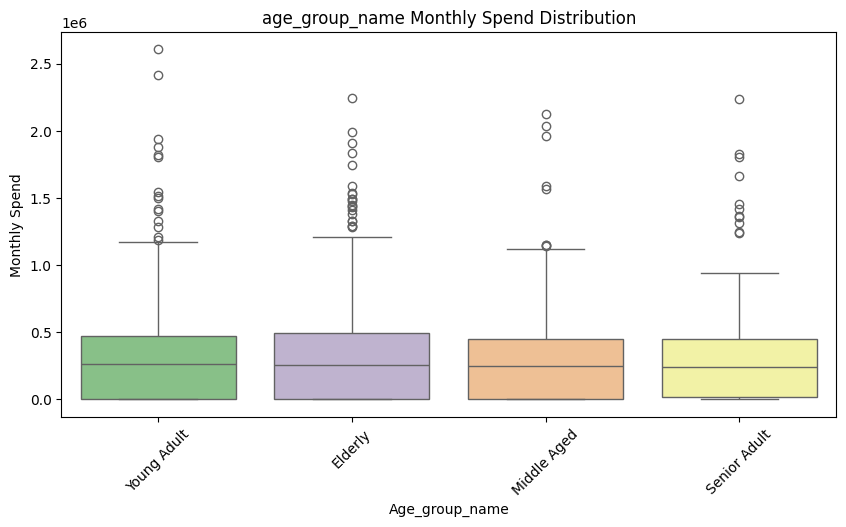

In [ ]:
# Age_group_name vs Monthly Spend

monthly_summary_seg = pd.merge(monthly_summary, df_customer[['customer', 'age_group_name']], on='customer', how='left')

plt.figure(figsize=(10, 5))
sns.boxplot(data=monthly_summary_seg, x='age_group_name', y='monthly_spend', palette='Accent')
plt.title('age_group_name Monthly Spend Distribution')
plt.xticks(rotation=45)
plt.xlabel('Age_group_name')
plt.ylabel('Monthly Spend')
plt.show()

#### **Multivariate Analysis**

image.png

In [ ]:
monthly_spend.head()

,customer,month,monthly_spend
0,A1,2004-01,1511169
1,A1,2004-02,41381
2,A1,2004-05,131196
3,A1,2005-01,398403
4,A1,2005-02,1404190


In [ ]:
monthly_spend['month'] = monthly_spend['month'].dt.to_timestamp()

In [ ]:
# @title **Monthly Spend of Each Customer**
fig = px.line(monthly_spend,
              x='month',
              y='monthly_spend',
              color='customer',
              title='Monthly Spend of Each Customer',
              labels={'monthly_spend': 'Amount Spent', 'month': 'Month'})
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
# @title **Monthly Spend of Each Customer**
# ''' similor to above but little more interactive with single customer id '''



import plotly.graph_objects as go

# Assuming 'monthly_spend' is your DataFrame with columns: 'month', 'monthly_spend', 'customer'
customers = monthly_spend['customer'].unique()

fig = go.Figure()

# Add a trace for each customer, initially only the first is visible
for i, cust in enumerate(customers):
    cust_data = monthly_spend[monthly_spend['customer'] == cust]
    fig.add_trace(go.Scatter(
        x=cust_data['month'],
        y=cust_data['monthly_spend'],
        mode='lines+markers',
        name=str(cust),
        visible=(i == 0),  # Only first customer visible by default
        marker=dict(size=8),
        line=dict(width=3)
    ))

# Create dropdown buttons for each customer
dropdown_buttons = [
    dict(
        label=str(cust),
        method='update',
        args=[
            {'visible': [i == j for j in range(len(customers))]},
            {'title': f'Monthly Spend of Customer {cust}'}
        ]
    )
    for i, cust in enumerate(customers)
]

fig.update_layout(
    title='Monthly Spend of Each Customer',
    xaxis_title='Month',
    yaxis_title='Amount Spent',
    xaxis_tickangle=-45,
    showlegend=False,  # Hide legend since dropdown is used
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.15,  # Position the dropdown to the right
        y=1.15
    )],
    plot_bgcolor='white',
    paper_bgcolor='whitesmoke',
    font=dict(size=14)
)

fig.show()

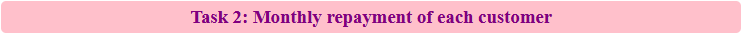

In [ ]:
monthly_repayment['month'] = monthly_repayment['month'].dt.to_timestamp()

In [ ]:
# @title **Monthly Repayment of Each Customer**
fig = px.line(monthly_repayment,
              x='month',
              y='monthly_repayment',
              color='customer',
              title='Monthly Repayment of Each Customer',
              labels={'monthly_repayment': 'Repayment Amount', 'month': 'Month'})
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

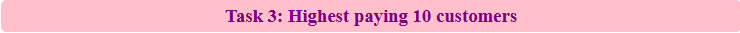

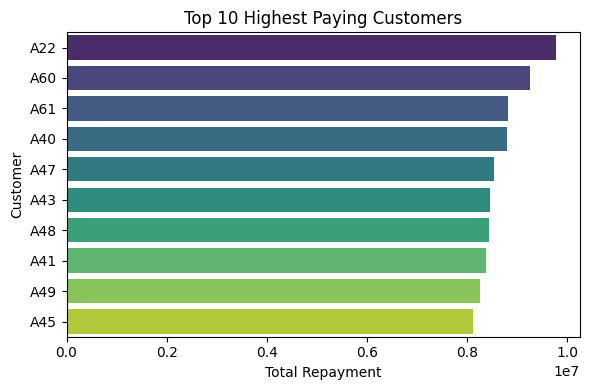

In [ ]:
# @title **Top 10 Highest Paying Customers**
total_repayment = monthly_repayment.groupby('customer')['monthly_repayment'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=total_repayment, x='monthly_repayment', y='customer', palette='viridis')
plt.title('Top 10 Highest Paying Customers')
plt.xlabel('Total Repayment')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

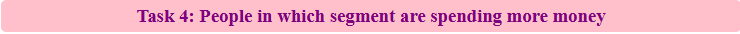

In [ ]:
df_merged = pd.merge(df_spend, df_customer, on='customer', how='left')

In [ ]:
df_merged.rename(columns={'amount': 'amount_spent'}, inplace=True)

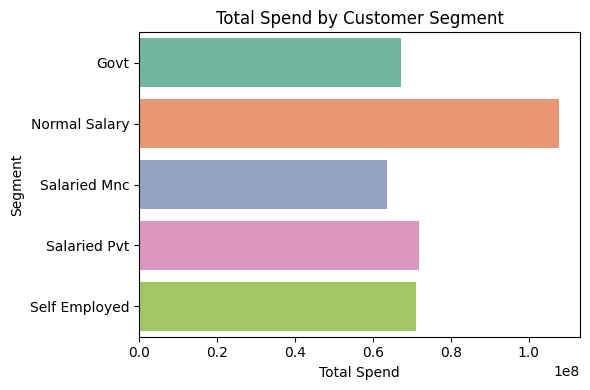

In [ ]:
segment_spend = df_merged.groupby('segment')['amount_spent'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=segment_spend, x='amount_spent', y='segment', palette='Set2')
plt.title('Total Spend by Customer Segment')
plt.xlabel('Total Spend')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

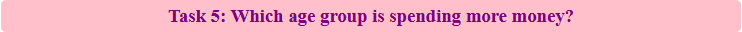

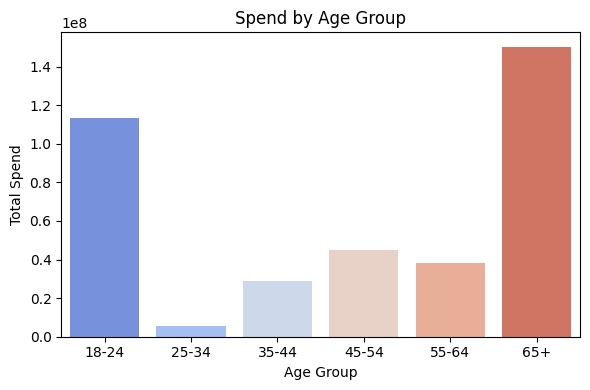

In [ ]:
agegroup_spend = df_merged.groupby('age_group')['amount_spent'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=agegroup_spend, x='age_group', y='amount_spent', palette='coolwarm')
plt.title('Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()

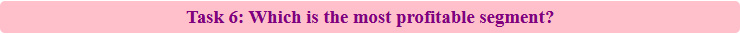

In [ ]:
profit_segment_df = pd.merge(monthly_summary, df_customer[['customer', 'segment']], on='customer', how='left')

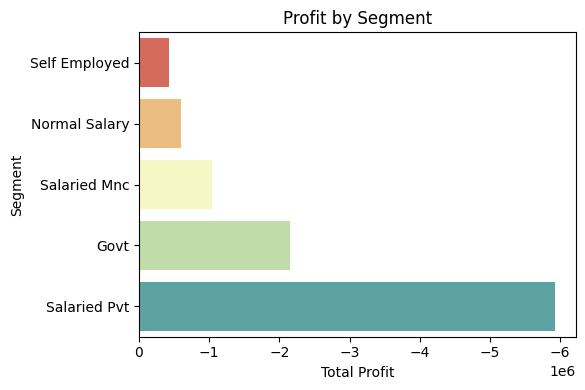

In [ ]:
segment_profit = profit_segment_df.groupby('segment')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=segment_profit, x='profit', y='segment', palette='Spectral')
plt.title('Profit by Segment')
plt.xlabel('Total Profit')
plt.ylabel('Segment')
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()

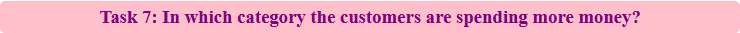

In [ ]:
df_spend

,customer,month,type,amount,spend_month
0,A1,2004-01-12,JEWELLERY,473775,2004-01
1,A1,2004-01-03,PETRO,335578,2004-01
2,A1,2004-01-15,CLOTHES,371040,2004-01
3,A1,2004-01-25,FOOD,141177,2004-01
4,A1,2005-01-17,CAMERA,398403,2005-01
...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,195841,2006-02
1496,A68,2006-03-25,BUS TICKET,284262,2006-03
1497,A69,2006-03-31,BUS TICKET,206552,2006-03
1498,A70,2006-03-23,BUS TICKET,41024,2006-03


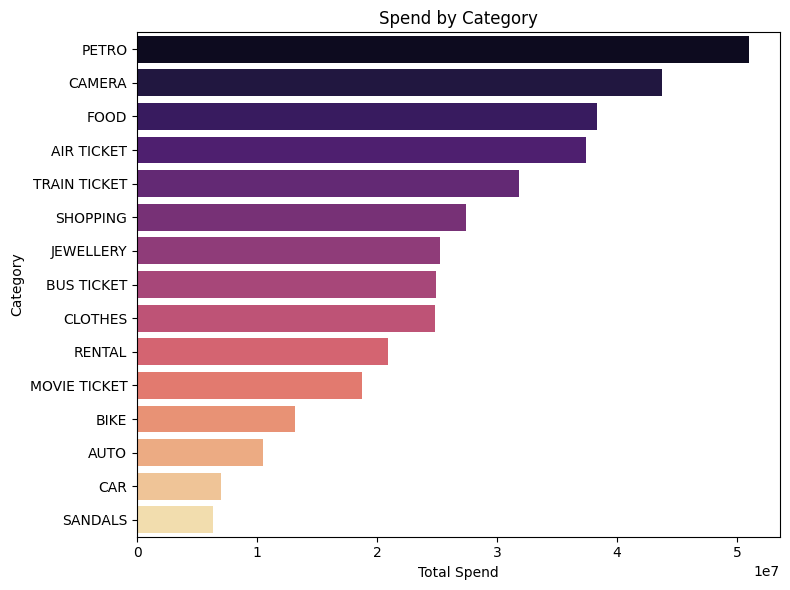

In [ ]:
category_spend = df_spend.groupby('type')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=category_spend, x='amount', y='type', palette='magma')
plt.title('Spend by Category')
plt.xlabel('Total Spend')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

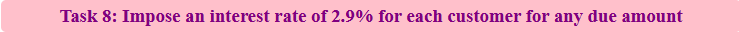

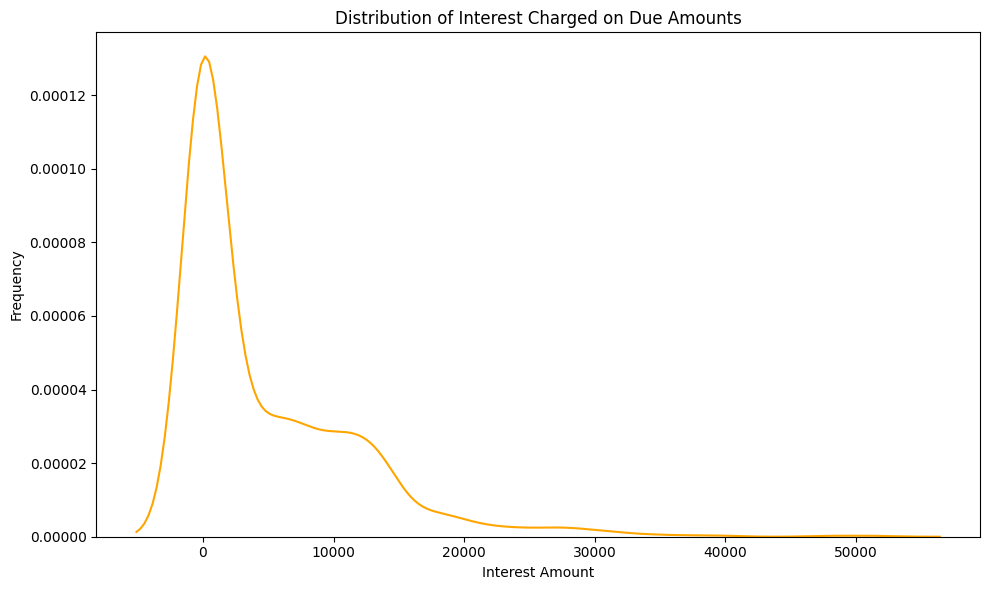

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(monthly_summary['interest'], color='orange')
plt.title('Distribution of Interest Charged on Due Amounts')
plt.xlabel('Interest Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

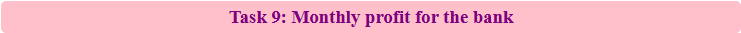

In [ ]:
monthly_profit_with_interest.head()

,month,monthly_profit
0,2004-01,-6860923.602
1,2004-02,-1654529.416
2,2004-03,458984.446
3,2004-04,194759.909
4,2004-05,1433221.601


In [ ]:
monthly_profit_with_interest['month'] = monthly_profit_with_interest['month'].dt.to_timestamp()

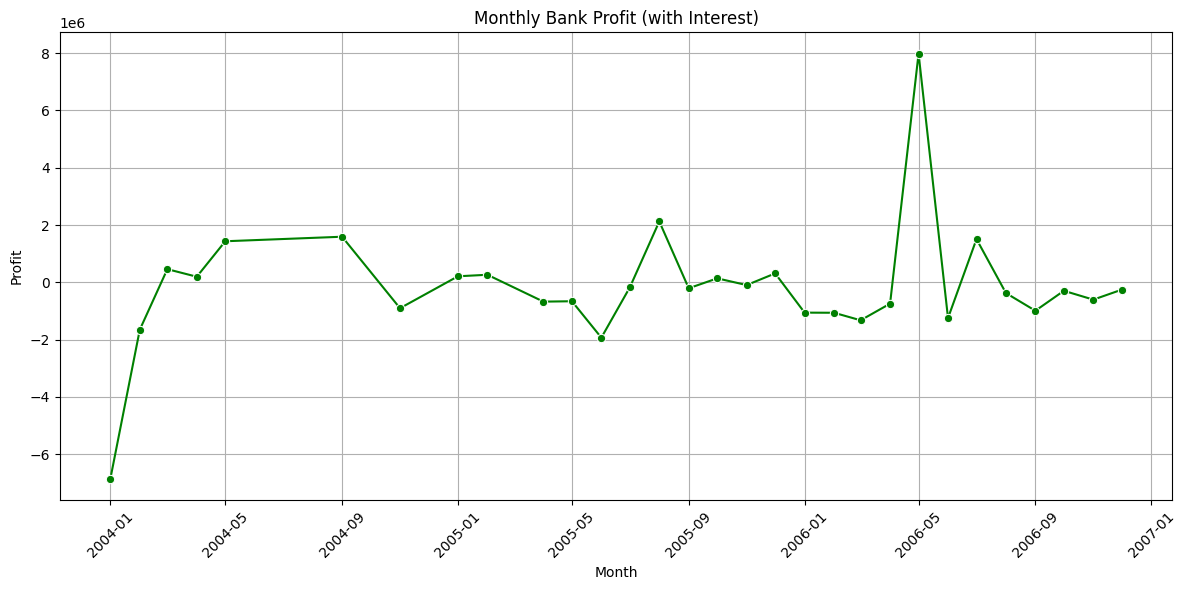

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit_with_interest, x='month', y='monthly_profit', marker='o', color='green')
plt.title('Monthly Bank Profit (with Interest)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#df.to_csv("processed_credit_card_data.csv", index=False)